These are notes on my preliminary EDA for the General Assembly Data Science Intensive. The ultimate goal for my Capstone is to create a variation of a recommendation engine: a webapp that recommends music to a user, based on their Spotify activity, that is like music they listen to -- but a completely different genre, or in a different language, or from a wildly different decade -- or, who knows, maybe all three?

## Capstone Part Two

### Process: ###
My first instinct for performing EDA was to use the Million Song Dataset (MSD) and try to cluster listeners or types of songs in some unsupervised manner. I wanted to perhaps come up with some broad archetypes of music listener. This approach was inspired by [Klarafy](http://klarafy.klara.be/en/). Klarafy is kind of like a recommendation engine in that it analyzes a Spotify playlist, comes up with some metrics, and assigns a group of songs hand-selected ahead of time to be recommended to you based on your metrics. (Ideally, my engine will be able to select songs from Spotify on its own, without my, for example, giving it a list to draw from.) Perhaps clustering listeners from the MSD would allow me to do something similar, though in reverse: to assign a listener to a pre-calculated 'type' or 'group' of listeners, then task the Spotify API to trawl through its archives to find new songs based on metrics typical of that 'group' of listeners. I started by downloaded the 1.8GB subset of the Million Song Dataset (the entire dataset is 280GB.) This data, however, is organized in a far more complicated fashion than I realized. For the sake of showing I can, in fact, access Spotify data and perform analysis on it, I therefore turned to the Spotipy Python library, by Paul Lamere.

In this write-up I demonstrate the basic metrics which Spotify stores for each song in its archives, primarily by analyzing my own Spotify library.

The song attributes returned by the Spotify API that I will be examining are described [here](https://developer.spotify.com/web-api/get-audio-features/).

In [250]:
# import statements
import matplotlib.pyplot as plt
import simplejson as json
import pandas as pd
import seaborn as sns 

import sys
import spotipy
import spotipy.util as util
import pprint

%matplotlib inline

In [251]:
# setting variables for spotipy later
token = util.prompt_for_user_token('#####',
                           scope,
                           client_id='#####',
                           client_secret='#####',
                           redirect_uri='#####')

scope = 'user-library-read'
sp = spotipy.Spotify(auth=token)
username = '#####' 

In [252]:
# This is code provided with Spotipy and was not authored by me.
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print(track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print("Can't get token for", username)

For the Portuguese Goth Metal Bands - The Mountain Goats
Drinking Game - Nothing Painted Blue
01 Ghosts I - Nine Inch Nails
02 Ghosts I - Nine Inch Nails
03 Ghosts I - Nine Inch Nails
04 Ghosts I - Nine Inch Nails
05 Ghosts I - Nine Inch Nails
06 Ghosts I - Nine Inch Nails
07 Ghosts I - Nine Inch Nails
08 Ghosts I - Nine Inch Nails
09 Ghosts I - Nine Inch Nails
10 Ghosts II - Nine Inch Nails
11 Ghosts II - Nine Inch Nails
12 Ghosts II - Nine Inch Nails
13 Ghosts II - Nine Inch Nails
14 Ghosts II - Nine Inch Nails
15 Ghosts II - Nine Inch Nails
16 Ghosts II - Nine Inch Nails
17 Ghosts II - Nine Inch Nails
18 Ghosts II - Nine Inch Nails


In [26]:
results = sp.search(q='weezer', limit=20)
for i, t in enumerate(results['tracks']['items']):
    print(' ', i, t['name'])

  0 Island In The Sun
  1 Say It Ain't So
  2 Buddy Holly
  3 Beverly Hills
  4 Hash Pipe
  5 Say It Ain't So
  6 Undone - The Sweater Song
  7 Thank God For Girls
  8 Buddy Holly
  9 Feels Like Summer
  10 Happy Hour
  11 Pork And Beans
  12 Undone - The Sweater Song
  13 Happy Hour
  14 My Name Is Jonas
  15 My Name Is Jonas
  16 King Of The World
  17 Only In Dreams
  18 Mexican Fender
  19 Jacked Up


In [36]:
def show_tracks(tracks):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print(i, track['artists'][0]['name'],
            track['name'])

In [253]:
all_playlisted_tracks = []
playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    if playlist['owner']['id'] == username:
        print('\n')
        print(playlist['name'])
        print('  total tracks', playlist['tracks']['total'])
        results = sp.user_playlist(username, playlist['id'],
            fields="tracks,next")
        tracks = results['tracks']
        all_playlisted_tracks.append(tracks)
        show_tracks(tracks)
        while tracks['next']:
            tracks = sp.next(tracks)
            show_tracks(tracks)



Destroyer – ken
  total tracks 11
0 Destroyer Sky’s Grey
1 Destroyer In the Morning
2 Destroyer Tinseltown Swimming in Blood
3 Destroyer Cover From the Sun
4 Destroyer Saw You at the Hospital
5 Destroyer A Light Travels Down the Catwalk
6 Destroyer Rome
7 Destroyer Sometimes in the World
8 Destroyer Ivory Coast
9 Destroyer Stay Lost
10 Destroyer La Regle du Jeu


echo
  total tracks 32
0 Антоха МС Спорт-брат
1 Пасош Лето
2 Anacondaz Бесит
3 Антоха МС Ритм сердца
4 Хаски Мармелад
5 Face Лиза
6 монеточка Последняя дискотека
7 Валентин Стрыкало Кладбище самолетов
8 Король и Шут Марионетки
9 Валентин Стрыкало Дешёвые драмы
10 Noize MC Yes Future!
11 Markul Спрут
12 Kizaru Марихуана
13 25/17 Она не такая, как все
14 Lumen Гореть
15 Король и Шут Мёртвый анархист
16 Егор Летов Моя оборона
17 25/17 Клыки
18 Егор Летов Все идет по плану
19 Би-2 Дебют - Bonus Track
20 Король и Шут Северный флот
21 Lumen Sid & Nancy
22 Bumble Beezy Desiigner
23 Ногу Свело! Наши юные смешные голоса
24 Кино После

0 The Outfield All The Love
1 Grandaddy Brush with the Wild
2 Freedy Johnston Bad Reputation
3 The Fixx Stand Or Fall
4 Jason Falkner Author Unknown
5 Eddie & The Hot Rods Do Anything You Wanna Do
6 Adam Ant Wonderful
7 Velvet Crush Hold Me Up
8 Joe Jackson Steppin' Out
9 The Saints Know Your Product - 2004 Remastered Version
10 Lion You've Got a Woman
11 Atom And His Package I’m Downright Amazed At What I Can Destroy With Just A Hammer
12 Crying Premonitory Dream
13 Polvo Thermal Treasure
14 Missy Elliott The Rain (Supa Dupa Fly)
15 Joni Mitchell All I Want
16 Benji Hughes The Mummy
17 The Rubinoos I Think We're Alone Now
18 The Wipers Taking Too Long
19 The Boomtown Rats Up All Night
20 Matthew Sweet Sick of Myself
21 Marshall Crenshaw Whenever You're On My Mind
22 The Dream Syndicate That's What You Always Say
23 The Smithereens Behind The Wall Of Sleep
24 Kitchens Of Distinction The 3rd Time We Opened the Capsule
25 Hoodoo Gurus I Want You Back
26 Generation X Kiss Me Deadly - 2002

0 The Mountain Goats For the Portuguese Goth Metal Bands
1 Hiss Golden Messenger When the Wall Comes Down
2 Superchunk I Got Cut
3 St. Vincent Masseduction
4 St. Vincent New York
5 The Mountain Goats California Jam
6 Carly Rae Jepsen Cut To The Feeling
7 Ibibio Sound Machine Color in Your Cheeks
8 Superchunk Break the Glass
9 The National The System Only Dreams in Total Darkness
10 The National Turtleneck
11 BC Unidos Trouble in the Streets


stereogum 2011 album of the week
  total tracks 108
0 Dum Dum Girls Always Looking
1 Dum Dum Girls Bedroom Eyes
2 Dum Dum Girls Just a Creep
3 Dum Dum Girls In My Head
4 Dum Dum Girls Heartbeat (Take It Away)
5 Dum Dum Girls Caught in One
6 Dum Dum Girls Coming Down
7 Dum Dum Girls Wasted Away
8 Dum Dum Girls Teardrops on My Pillow
9 Dum Dum Girls Hold Your Hand
10 Zola Jesus Swords
11 Zola Jesus Avalanche
12 Zola Jesus Vessel
13 Zola Jesus Hikikomori
14 Zola Jesus Ixode
15 Zola Jesus Seekir
16 Zola Jesus In Your Nature
17 Zola Jesus Lick the Palm

0 Lower Dens Stem
1 Lower Dens Propagation
2 Lower Dens Lamb
3 Lower Dens Candy
4 Lower Dens Lion in Winter Pt. 1
5 Lower Dens Lion in Winter Pt. 2
6 Lower Dens Nova Anthem
7 Lower Dens In the End is the Beginning
8 Tragedy No Cemeteries Here
9 Tragedy Close At Hand
10 Tragedy The Grim Infinite
11 Tragedy The Feeding Hour
12 Tragedy Wail of Sirens
13 Tragedy Darker Days Ahead
14 Tragedy Black Against Night
15 Tragedy Power Fades
16 Tragedy To Earth Like Dust
17 Killer Mike Big Beast (feat. Bun B, T.I., and Trouble)
18 Killer Mike Untitled (feat. Scar)
19 Killer Mike Go!
20 Killer Mike Southern Fried
21 Killer Mike JoJo's Chillin
22 Killer Mike Reagan
23 Killer Mike Don't Die
24 Killer Mike Ghetto Gospel
25 Killer Mike Butane (Champion's Anthem) [feat. El-P]
26 Killer Mike Anywhere But Here (feat. Emily Panic)
27 Killer Mike Willie Burke Sherwood
28 Killer Mike R.A.P. Music


stereogum 2017 album of week
  total tracks 445
0 Dropkick Murphys The Lonesome Boatman
1 Dropkick Murphys Rebel

0 Dizzee Rascal Everything Must Go
1 Dizzee Rascal Slow Your Roll
2 Dizzee Rascal Sick A Dis
3 Dizzee Rascal Way I Am
4 Dizzee Rascal Man Of The Hour
5 Vic Mensa Say I Didn't
6 Vic Mensa Memories On 47th St.
7 Vic Mensa Rollin' Like A Stoner
8 Vic Mensa Homewrecker
9 Vic Mensa Gorgeous
10 Vic Mensa Heaven On Earth
11 Vic Mensa Card Cracker - Skit
12 Vic Mensa Down For Some Ignorance (Ghetto Lullaby)
13 Vic Mensa Coffee & Cigarettes
14 Vic Mensa Wings
15 Vic Mensa Heaven On Earth - Reprise
16 Vic Mensa The Fire Next Time
17 Vic Mensa We Could Be Free
18 Vic Mensa Rage
19 Vic Mensa OMG
20 Girl Ray Just Like That
21 Girl Ray Monday Tuesday
22 Girl Ray Stupid Things
23 Girl Ray Don't Go Back at Ten
24 Girl Ray Cutting Shapes
25 Girl Ray Preacher
26 Girl Ray A Few Months
27 Girl Ray Earl Grey (Stuck in a Groove)
28 Girl Ray Where Am I Now
29 Girl Ray Stupid Things (Reprise)
30 Girl Ray Ghosty
31 Girl Ray Waiting Ages
32 Girl Ray Trouble (Bonus Track)
33 Downtown Boys A Wall
34 Downtown Boys

Note: I have more than 16 Spotify playlists; the Spotify API only returns so many elements at once, and I will need to get more familiar with it to work around that. For now, songs from 16 playlists will be enough to perform some introductory EDA.

Usefully, my Spotify library includes songs using non-Roman characters. If this causes any error, I will notice that while coding in response to my own library.

In [262]:
len(all_playlisted_tracks)

16

In [268]:
# The first song in each playlist
for playlist in all_playlisted_tracks:
    print(playlist['items'][0]['track']['name'])

Sky’s Grey
Спорт-брат
Марионетки
Faded
Dieuleul-Dieuleul
Fish Beach
13 Ghosts II
Slack Motherfucker
Regret
Nobody Else Will Be There
For the Portuguese Goth Metal Bands
Always Looking
Laundry and Lasers
The Lonesome Boatman
Going to Georgia
A Great Design


In [269]:
# sp = spotipy.Spotify(auth=token)
# sp.trace = False
# ranges = ['short_term', 'medium_term', 'long_term']
# for range in ranges:
#     print("range:", range)
#     results = sp.current_user_top_tracks(time_range=range, limit=50)
#     for i, item in enumerate(results['items']):
#         print(i, item['name'], '//', item['artists'][0]['name'])
    

After some messing around, I discover that it's easier to call saved tracks for a user than all songs from playlists for a user; the first round of EDA -- the 'proof of concept' EDA, i.e. proof it's possible to access this data at all -- will be performed on my saved tracks. (Due to Spotify's methods of handling music saving, these tracks sometimes, though not always, overlap with tracks on my playlists.)

In [61]:
saved_tracks = sp.current_user_saved_tracks(limit=50)

In [278]:
saved_tracks['items'][0]

{'added_at': '2017-09-22T16:15:46Z',
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3hyGGjxu73JuzBa757H6R5'},
     'href': 'https://api.spotify.com/v1/artists/3hyGGjxu73JuzBa757H6R5',
     'id': '3hyGGjxu73JuzBa757H6R5',
     'name': 'The Mountain Goats',
     'type': 'artist',
     'uri': 'spotify:artist:3hyGGjxu73JuzBa757H6R5'}],
   'available_markets': ['AD',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'EC',
    'EE',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IS',
    'IT',
    'JP',
    'LI',
    'LT',
    'LU',
    'LV',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
    'NZ',
    'PA',
    'PE',
    'PH',
    'PL',
    'PT',
    'PY',
    'SE',
    'SG',
    'SK',
    'SV',
    'TH',


In [72]:
# Pulling titles from the saved_tracks list:
saved_tracks['items'][0]['track']['name']

'For the Portuguese Goth Metal Bands'

In [70]:
# Pulling track_id from the saved_tracks list:
saved_tracks['items'][0]['track']['id']

'5MZRmb0G0t9OsEaY79bjHx'

In [91]:
# List of track names
name_list = []
for i in saved_tracks['items']:
    name_list.append(i['track']['nametable = [['Heading1', 'Heading2'], [1 , 2], [3, 4]]'])

In [281]:
# List of track ids
id_list = []
for i in saved_tracks['items']:
    id_list.append(i['track']['id'])

Using `sp.audio_features` on a track ID returns the track information I want to get: the metrics of danceability, energy, instrumentalness, liveness, loudness, speechiness, temp, and valence. I don't know that all of these metrics will end up significant -- I'm especially skeptical of liveness.

In [77]:
sp.audio_features('5MZRmb0G0t9OsEaY79bjHx')

[{'acousticness': 0.835,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5MZRmb0G0t9OsEaY79bjHx',
  'danceability': 0.689,
  'duration_ms': 249760,
  'energy': 0.442,
  'id': '5MZRmb0G0t9OsEaY79bjHx',
  'instrumentalness': 0.785,
  'key': 0,
  'liveness': 0.116,
  'loudness': -15.803,
  'mode': 1,
  'speechiness': 0.0361,
  'tempo': 101.948,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5MZRmb0G0t9OsEaY79bjHx',
  'type': 'audio_features',
  'uri': 'spotify:track:5MZRmb0G0t9OsEaY79bjHx',
  'valence': 0.566}]

In [80]:
# Putting the features themselves in an array
library_features = []
for i in id_list:
    library_features.append(sp.audio_features(i))

In [84]:
library_features[0]

[{'acousticness': 0.835,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5MZRmb0G0t9OsEaY79bjHx',
  'danceability': 0.689,
  'duration_ms': 249760,
  'energy': 0.442,
  'id': '5MZRmb0G0t9OsEaY79bjHx',
  'instrumentalness': 0.785,
  'key': 0,
  'liveness': 0.116,
  'loudness': -15.803,
  'mode': 1,
  'speechiness': 0.0361,
  'tempo': 101.948,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5MZRmb0G0t9OsEaY79bjHx',
  'type': 'audio_features',
  'uri': 'spotify:track:5MZRmb0G0t9OsEaY79bjHx',
  'valence': 0.566}]

In [89]:
pd.DataFrame(library_features[0])

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.835,https://api.spotify.com/v1/audio-analysis/5MZR...,0.689,249760,0.442,5MZRmb0G0t9OsEaY79bjHx,0.785,0,0.116,-15.803,1,0.0361,101.948,4,https://api.spotify.com/v1/tracks/5MZRmb0G0t9O...,audio_features,spotify:track:5MZRmb0G0t9OsEaY79bjHx,0.566


In [94]:
headers = name_list

In [313]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo']

In [300]:
danceability = []
for i in library_features:
    t = pd.DataFrame(i)[features]['danceability'].values
    danceability.append(t)

energy = []
for i in library_features:
    t = pd.DataFrame(i)[features]['energy'].values
    energy.append(t)
    
instrumentalness = []
for i in library_features:
    t = pd.DataFrame(i)[features]['instrumentalness'].values
    instrumentalness.append(t)
    
liveness = []
for i in library_features:
    t = pd.DataFrame(i)[features]['liveness'].values
    liveness.append(t)
    
speechiness = []
for i in library_features:
    t = pd.DataFrame(i)[features]['speechiness'].values
    speechiness.append(t)
    
tempo = []
for i in library_features:
    t = pd.DataFrame(i)[features]['tempo'].values
    tempo.append(t)
    
acousticness = []
for i in library_features:
    t = pd.DataFrame(i)[features]['acousticness'].values
    acousticness.append(t)

In [301]:
songs_df = pd.DataFrame()

songs_df['titles'] = name_list
songs_df['danceability'] = [float(x) for x in danceability]
songs_df['energy'] = [float(x) for x in energy]
songs_df['instrumentalness'] = [float(x) for x in instrumentalness]
songs_df['liveness'] = [float(x) for x in liveness]
songs_df['speechiness'] = [float(x) for x in speechiness]
songs_df['tempo'] = [float(x) for x in tempo]
songs_df['acousticness'] = [float(x) for x in acousticness]

In [302]:
songs_df.head()

,titles,danceability,energy,instrumentalness,liveness,speechiness,tempo,acousticness
0,For the Portuguese Goth Metal Bands,0.689,0.4420,0.7850,0.116,0.0361,101.948,0.83500
1,Drinking Game,0.594,0.6760,0.0213,0.061,0.0594,123.808,0.00593
2,01 Ghosts I,0.199,0.0180,0.8920,0.110,0.0428,60.758,0.92000
3,02 Ghosts I,0.160,0.0168,0.9830,0.103,0.0461,109.927,0.97700
4,03 Ghosts I,0.675,0.7830,0.8460,0.304,0.0268,135.012,0.54500


In [303]:
songs_df = songs_df.set_index('titles')

In [304]:
songs_df.head()

,danceability,energy,instrumentalness,liveness,speechiness,tempo,acousticness
titles,,,,,,,
For the Portuguese Goth Metal Bands,0.689,0.4420,0.7850,0.116,0.0361,101.948,0.83500
Drinking Game,0.594,0.6760,0.0213,0.061,0.0594,123.808,0.00593
01 Ghosts I,0.199,0.0180,0.8920,0.110,0.0428,60.758,0.92000
02 Ghosts I,0.160,0.0168,0.9830,0.103,0.0461,109.927,0.97700
03 Ghosts I,0.675,0.7830,0.8460,0.304,0.0268,135.012,0.54500


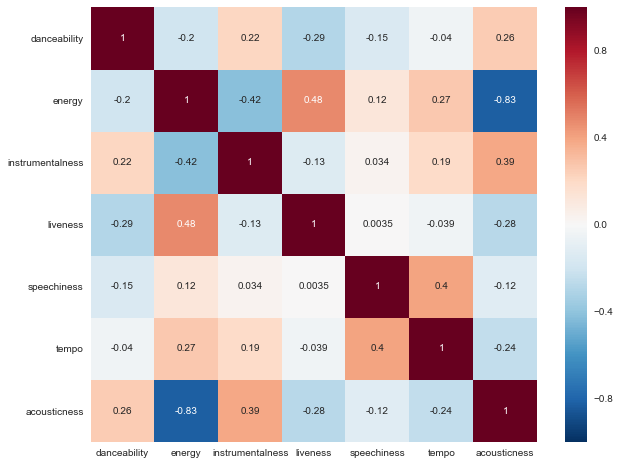

In [305]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(songs_df.corr(), annot=True, ax=ax);

A correlation heatmap doesn't show too many surprises: most features aren't _too_ strongly correlated with each other. To what extent this will matter as I go on to build models is yet to be determined, but it's something to stay aware of.

## Exploration of Feature Distribution
To show that this data can be handled and to explore distributions (drawn from an admittedly non-representative sample), I started with histograms. All conclusions drawn here are very tentative: I am aware I'm working from a biased dataset.

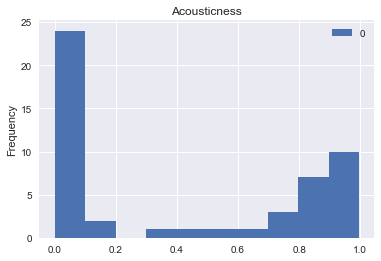

In [307]:
pd.DataFrame(acousticness).plot(kind='hist',
                               title='Acousticness');

From this initial plot, 'acousticness' might be meaningful as a binary variable: 1 if the acousticness is under 0.2, otherwise 0. Whether this holds for more data is something to look into.

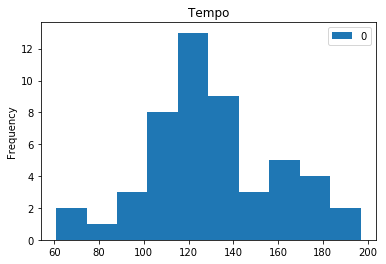

In [210]:
pd.DataFrame(tempo).plot(kind='hist',
                               title='Tempo');

Tempo being evenly distributed isn't particularly surprising, but it's interesting to see a roughly normal distribution even inside a small and biased dataset.

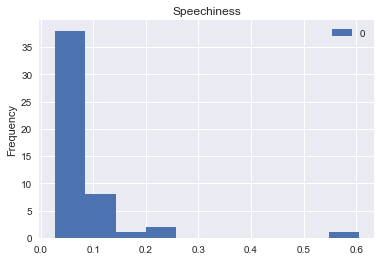

In [308]:
pd.DataFrame(speechiness).plot(kind='hist',
                               title='Speechiness');

Speechiness has the same dramatically skewed distribution as acousticness. If I choose to include this variable, it may be encoded, like acousticness, as a binary dummy.

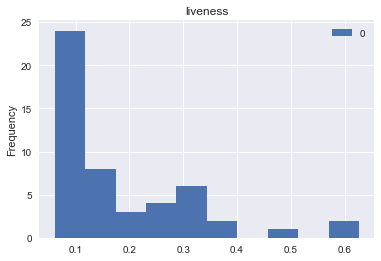

In [309]:
pd.DataFrame(liveness).plot(kind='hist',
                               title='liveness');

Liveness is very strongly right-skewed. The heatmap showed that liveness has a strong correlation with energy, which appears to have greater variance; including both liveness and energy may not provide much more signal than including merely energy.

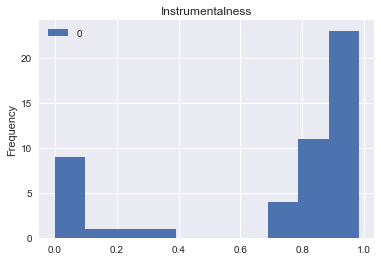

In [310]:
pd.DataFrame(instrumentalness).plot(kind='hist',
                               title='Instrumentalness');

I'm not particularly surprised by the bimodal-ish distribution of instrumentalness. I listen to a fair amount of instrumental music, and the 50 saved songs which Spotify returned includes an entire album of instrumental/ambient music. I need to investigate the extent to which the bimodal distribution here is representative of a broader listener base.

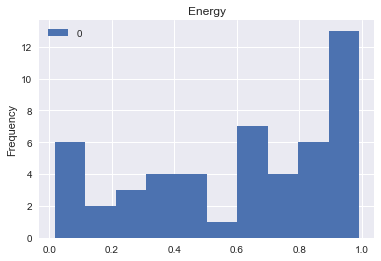

In [311]:
pd.DataFrame(energy).plot(kind='hist',
                               title='Energy');

Energy has a wide distribution, unsurprisingly, although I suspect a more representative sample would look more like a normal distribution -- I also need to explore this further.

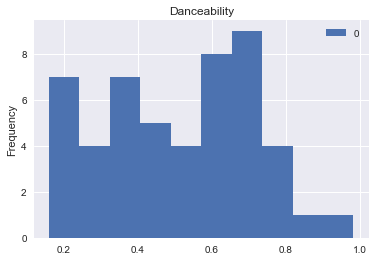

In [312]:
pd.DataFrame(danceability).plot(kind='hist',
                               title='Danceability');

Of all of Spotify's metrics, danceability is the one that seems most opaque to me. I'm surprised to see this distribution here and need to evaluate further.

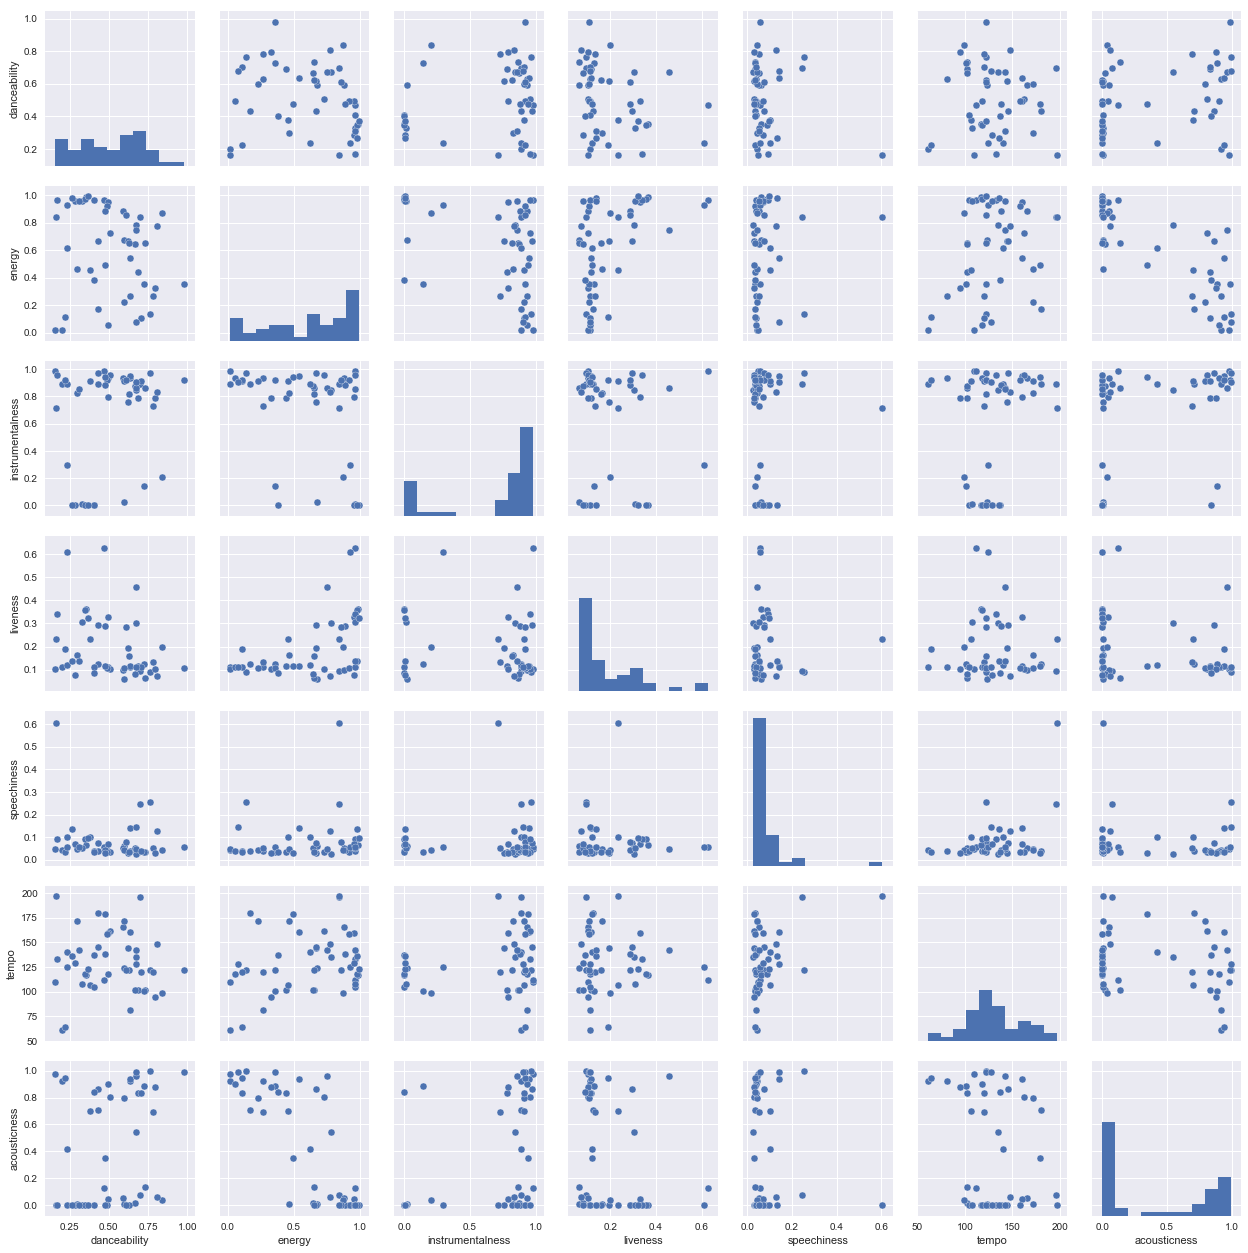

In [335]:
sns.pairplot(songs_df);

Nothing too surprising here -- there's a clear relationship between energy and liveness, and the number of seriously right- or left-skewed variables makes for some predictable clumps of data close to the axes at 0 and 1.

## Next Steps

My first next step will be moving away from Spotify and writing my own functions to interact with the Spotify API. There's only certain information I need, and it will be easiest to handle if I control not only what I query but also how the responses are stored.

I think using unsupervised clustering techniques on the MSD is still interesting; however, I will need to seriously put some time into learning how JSON files are stored to make progress with that.